In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Binarizer,Normalizer,OneHotEncoder,LabelEncoder

In [98]:
np.random.seed(5)
a = np.random.normal(0, 2, 10000)
b = np.random.normal(5, 3, 10000)
c = np.random.normal(-5, 5, 10000)

df = pd.DataFrame({
    'A' : a,
    'B' : b,
    'C' : c
})
df

,A,B,C
0,0.882455,1.466990,-7.089363
1,-0.661740,0.571914,-3.105893
2,4.861542,7.828852,-1.039068
3,-0.504184,5.001904,-9.755722
4,0.219220,1.731128,-7.679528
...,...,...,...
9995,-0.068972,3.739968,-4.303864
9996,-2.167260,0.681434,-9.584910
9997,2.188712,9.860986,-9.986860
9998,0.595445,5.982577,-11.128039


<Axes: ylabel='Density'>

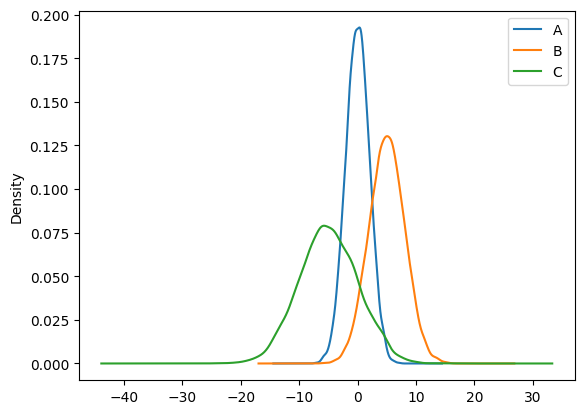

In [99]:
df.plot.kde()

In [100]:
scaler = StandardScaler()

In [101]:
scaled = scaler.fit_transform(df)

In [102]:
df = pd.DataFrame(scaled, columns=['A','B','C'])

<Axes: ylabel='Density'>

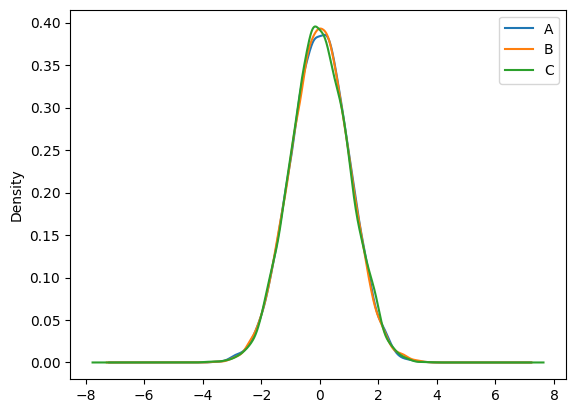

In [103]:
df.plot.kde()

In [104]:
minmax = MinMaxScaler()
mm_scaled = minmax.fit_transform(df)

<Axes: ylabel='Density'>

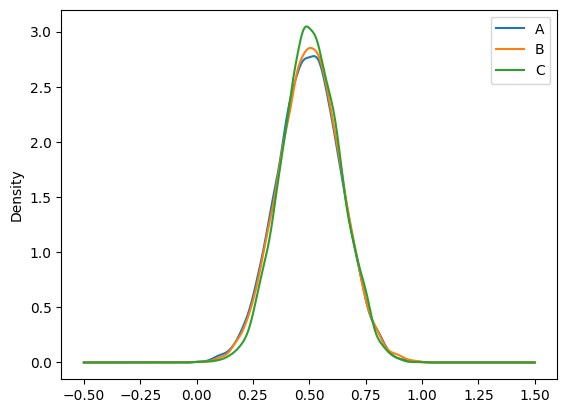

In [105]:
df = pd.DataFrame(mm_scaled,columns=['A','B','C'])
df.plot.kde()

In [106]:
rscaler = RobustScaler()

In [107]:
robust = rscaler.fit_transform(df)
df = pd.DataFrame(robust, columns=['A','B','C'])

<Axes: ylabel='Density'>

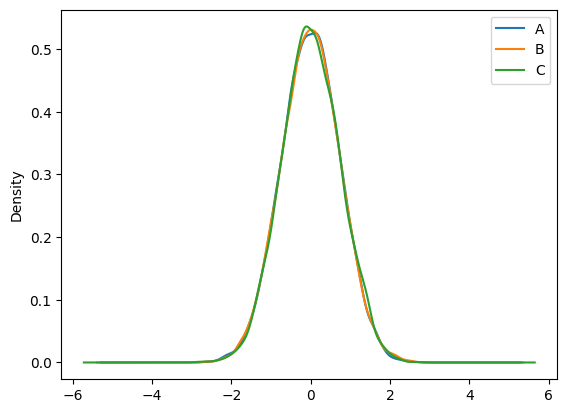

In [108]:
df.plot.kde()

In [109]:
binary = Binarizer(threshold=5)

a = np.array([[ 30, 10,  22],
              [ 20,  2,  10],
              [ 33,  5, 5]])

binary1 = binary.transform(a)
binary1

array([[1, 1, 1],
       [1, 0, 1],
       [1, 0, 0]])

In [110]:
X = [[5, 2, 3],
     [2, 4, 10],
     [6, 8, 6]]

sss = [np.sqrt(np.sum(np.power(X[i], 2))) for i in range(len(X))]

In [111]:
len(X)

3

In [112]:
np.array([X[k] / sss[k] for k in range(len(X))])

array([[0.81110711, 0.32444284, 0.48666426],
       [0.18257419, 0.36514837, 0.91287093],
       [0.51449576, 0.68599434, 0.51449576]])

In [113]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(X)

In [114]:
data_tf

array([[0.81110711, 0.32444284, 0.48666426],
       [0.18257419, 0.36514837, 0.91287093],
       [0.51449576, 0.68599434, 0.51449576]])

In [115]:
dff = pd.read_csv("peoples_dataset.csv")
dff

,Name,City,Gender,Department,Experience,TEAM
0,Alice,New York,Female,Sales,2,NaN
1,Bob,London,Male,Engineering,5,NaN
2,Charlie,Tokyo,Male,Sales,1,NaN
3,Diana,New York,Female,HR,3,NaN
4,Evan,London,Male,Engineering,7,NaN
5,Fiona,Tokyo,Female,Marketing,4,NaN
6,George,New York,Male,Marketing,6,NaN
7,Hannah,London,Female,HR,2,NaN
8,Ian,Tokyo,Male,Sales,8,NaN
9,Julia,New York,Female,Engineering,1,NaN


In [116]:
encoder = LabelEncoder()

# Encode columns in-place
for col in ["City", "Gender", "Department"]:
    dff[col] = encoder.fit_transform(dff[col])

print(dff.head())

      Name  City  Gender  Department  Experience  TEAM
0    Alice     1       0           3           2   NaN
1      Bob     0       1           0           5   NaN
2  Charlie     2       1           3           1   NaN
3    Diana     1       0           1           3   NaN
4     Evan     0       1           0           7   NaN


In [117]:
df = pd.read_csv("peoples_dataset.csv")

onehot_df = pd.get_dummies(df, columns=["City", "Gender", "Department"])
print(onehot_df.head())


      Name  Experience  TEAM  City_London  City_New York  City_Tokyo  \
0    Alice           2   NaN        False           True       False   
1      Bob           5   NaN         True          False       False   
2  Charlie           1   NaN        False          False        True   
3    Diana           3   NaN        False           True       False   
4     Evan           7   NaN         True          False       False   

   Gender_Female  Gender_Male  Department_Engineering  Department_HR  \
0           True        False                   False          False   
1          False         True                    True          False   
2          False         True                   False          False   
3           True        False                   False           True   
4          False         True                    True          False   

   Department_Marketing  Department_Sales  
0                 False              True  
1                 False             False  
2 

In [118]:
abc = df.join(onehot_df, lsuffix="name")
abc

,Namename,City,Gender,Department,Experiencename,TEAMname,Name,Experience,TEAM,City_London,City_New York,City_Tokyo,Gender_Female,Gender_Male,Department_Engineering,Department_HR,Department_Marketing,Department_Sales
0,Alice,New York,Female,Sales,2,NaN,Alice,2,NaN,False,True,False,True,False,False,False,False,True
1,Bob,London,Male,Engineering,5,NaN,Bob,5,NaN,True,False,False,False,True,True,False,False,False
2,Charlie,Tokyo,Male,Sales,1,NaN,Charlie,1,NaN,False,False,True,False,True,False,False,False,True
3,Diana,New York,Female,HR,3,NaN,Diana,3,NaN,False,True,False,True,False,False,True,False,False
4,Evan,London,Male,Engineering,7,NaN,Evan,7,NaN,True,False,False,False,True,True,False,False,False
5,Fiona,Tokyo,Female,Marketing,4,NaN,Fiona,4,NaN,False,False,True,True,False,False,False,True,False
6,George,New York,Male,Marketing,6,NaN,George,6,NaN,False,True,False,False,True,False,False,True,False
7,Hannah,London,Female,HR,2,NaN,Hannah,2,NaN,True,False,False,True,False,False,True,False,False
8,Ian,Tokyo,Male,Sales,8,NaN,Ian,8,NaN,False,False,True,False,True,False,False,False,True
9,Julia,New York,Female,Engineering,1,NaN,Julia,1,NaN,False,True,False,True,False,True,False,False,False


In [119]:
final = abc.drop(['TEAM'], axis='columns')
final

,Namename,City,Gender,Department,Experiencename,TEAMname,Name,Experience,City_London,City_New York,City_Tokyo,Gender_Female,Gender_Male,Department_Engineering,Department_HR,Department_Marketing,Department_Sales
0,Alice,New York,Female,Sales,2,NaN,Alice,2,False,True,False,True,False,False,False,False,True
1,Bob,London,Male,Engineering,5,NaN,Bob,5,True,False,False,False,True,True,False,False,False
2,Charlie,Tokyo,Male,Sales,1,NaN,Charlie,1,False,False,True,False,True,False,False,False,True
3,Diana,New York,Female,HR,3,NaN,Diana,3,False,True,False,True,False,False,True,False,False
4,Evan,London,Male,Engineering,7,NaN,Evan,7,True,False,False,False,True,True,False,False,False
5,Fiona,Tokyo,Female,Marketing,4,NaN,Fiona,4,False,False,True,True,False,False,False,True,False
6,George,New York,Male,Marketing,6,NaN,George,6,False,True,False,False,True,False,False,True,False
7,Hannah,London,Female,HR,2,NaN,Hannah,2,True,False,False,True,False,False,True,False,False
8,Ian,Tokyo,Male,Sales,8,NaN,Ian,8,False,False,True,False,True,False,False,False,True
9,Julia,New York,Female,Engineering,1,NaN,Julia,1,False,True,False,True,False,True,False,False,False
